# Linear and Nonlinear Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Visualizing Functions


A linear function is a function that satisfies or respects or "preserves" or "commutes with" the two fundamental operations of vector spaces: addition and scalar multiplication.

Specifically, if $V$ and $W$ are two vector spaces, then a function $f: V \to W$ is a _**linear function**_ if and only if:

- For any vector $\boldsymbol{v} \in V$ and any (scalar) real number $a \in \mathbb{R}$, the function $f$ "preserves" i.e., "commutes with" scalar multiplication:

  $$f (a \cdot \boldsymbol{v}) = a \cdot f (\boldsymbol{v})  \,.$$

- For any two vectors $\boldsymbol{v}_1, \boldsymbol{v}_2 \in V$, the function $f$ "preserves" i.e., "commutes with" addition:

  $$ f ( \boldsymbol{v}_1 + \boldsymbol{v}_2)  = f(\boldsymbol{v}_1) + f(\boldsymbol{v}_2) \,.$$

Here, we will try to visualize the effects that certain functions $f: \mathbb{R}^2 \to \mathbb{R}^2$ have on vectors; what it looks like when they are linear functions; and what it looks like when they are not linear functions.

To visualize the effect of linear functions on $\mathbb{R}^2$, we will see how these functions 'act' on or transform unit vectors $\boldsymbol{v} \in S = \{\boldsymbol{v} \mid \|\boldsymbol{v}\|_2 = 1\}$.  Below, we produce random points on the unit circle, first by drawing random points, and then normalizing them so that they are all unit vectors.

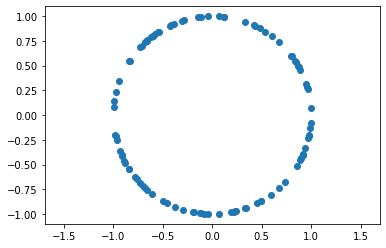

In [2]:
np.random.seed(345) #set random seed

n_points = 100
vv = np.random.normal(size = (2, n_points))
vv /= np.linalg.norm(vv, axis=0)
plt.scatter(vv[0], vv[1])
plt.axis('equal')
plt.show()

### Functions that preserve neither addition nor scalar multiplication


Let's see what happens if we apply the function $\sin(x)$ to the coordinates of $\boldsymbol{v}$ -- i.e., we map $\boldsymbol{v} = (v_1,v_2) \mapsto (\sin(v_1), \sin(v_2))$. We can visualize how this mapping transforms points on the unit circle with the following:

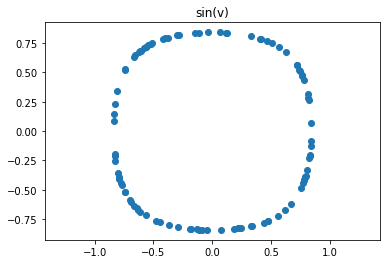

In [3]:
plt.scatter(np.sin(vv[0]), np.sin(vv[1]))
plt.title('sin(v)')
plt.axis('equal')
plt.show()

This function transforms the unit disc into a shape which is symmetric about the origin. However, we will see that this function not only fails to preserve addition, it also fails to preserve multiplication too.
So transforming the unit disc into a shape which is symmetric about the origin is not enough by itself to guarantee that either of the two operations is preserved.

Let's see what happens if we scale the input vectors $\boldsymbol{v}$ by some value $\alpha$. We do this by plotting the values $\sin(\alpha\boldsymbol{v})$ as well as $\alpha\cdot\sin(\boldsymbol{v})$. Here we use $\alpha=2$, but you can try different values as well.

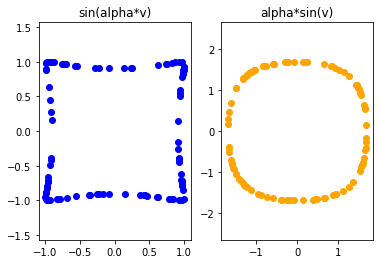

In [4]:
alpha = 2
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(np.sin(alpha*vv[0]), np.sin(alpha*vv[1]), color='blue')
ax2.scatter(alpha*np.sin(vv[0]), alpha*np.sin(vv[1]), color='orange')
ax1.axis('equal')
ax2.axis('equal')
ax1.set_title('sin(alpha*v)')
ax2.set_title('alpha*sin(v)')
plt.show()

As you can see, the condition $f(\alpha \boldsymbol{v}) = \alpha\cdot f(\boldsymbol{v})$ does _not_ hold for the function $f(\boldsymbol{v}) = \sin(\boldsymbol{v})$. Similarly, this function does not preserve addition: namely, for any vectors $\boldsymbol{v},\boldsymbol{u}$, it is not (in general) the case that $\sin(\boldsymbol{u} + \boldsymbol{v}) = \sin(\boldsymbol{u}) + \sin(\boldsymbol{v})$. Let's see this by looking at what we get by adding the vector $\boldsymbol{u} = (\sqrt{2}, -\sqrt{2})$ to each of the unit vectors $\boldsymbol{v}$ from before, and applying the $\sin$ function to them.

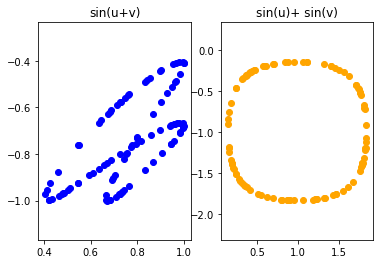

In [5]:
u = np.array([np.sqrt(2), -np.sqrt(2)])

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(np.sin(u[0] + vv[0]), np.sin(u[1] + vv[1]), color='blue')
ax2.scatter(np.sin(u[0]) + np.sin(vv[0]), np.sin(u[1]) + np.sin(vv[1]), color='orange')
ax1.axis('equal')
ax2.axis('equal')
ax1.set_title('sin(u+v)')
ax2.set_title('sin(u)+ sin(v)')
plt.show()

We see clearly that $\sin(\boldsymbol{u} + \boldsymbol{v})$ does _not_ give the same value as $\sin(\boldsymbol{u}) + \sin(\boldsymbol{v})$. Therefore, the $\sin$ function does not satisfy either of the required properties of a linear function.

### Functions that preserve scalar multiplication, but not addition

There are also functions $f$ which _do_ preserve scalar multplication, but _not_ addition. A function that preserves scalar multiplication but not addition "acts like a linear function" on every line through the origin, but it isn't consistent about what it does to different lines. Therefore we need at least a two-dimensional vector space to find a counterexample, since a one-dimensional vector space only has one line through the origin.

For the example we give here, it is easiest to work in polar coordinates, wherein we represent a vector $\boldsymbol{v}$ as $(r\cos(\theta), r\sin(\theta))$. Then the function $f$ defined by


$$
f(r\cos(\theta), r\sin(\theta)) = \left(\frac{r\cos(\theta)}{|\cos(\theta)|+|\sin(\theta)|}, \frac{r\sin(\theta)}{|\cos(\theta)|+|\sin(\theta)|}\right)
$$


satisfies the desired property. As we will see, this function 'bends' the unit circle into a diamond shape. Don't worry about how we came up with this function (in fact, we found it on [stack exchange](https://math.stackexchange.com/questions/2211907/map-not-preserving-vector-addition-but-preserving-scalar-multiplication)); for now, we will just use this as an example to show that such functions do indeed exist. Below we implement the function $f$.

In [6]:
def f(v):
    theta = np.arctan2(v[1], v[0])
    den = np.abs(np.cos(theta)) + np.abs(np.sin(theta))
    fv = v/den
    return fv

We can plot how this function acts on our vectors $\boldsymbol{v}$ with the following:

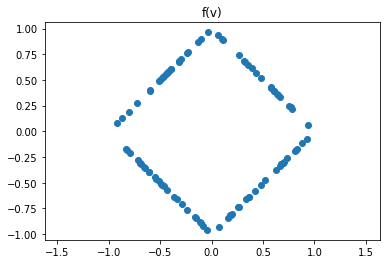

In [7]:
f_vv = np.array([f(v) for v in vv.T]).T

plt.scatter(f_vv[0], f_vv[1])
plt.title('f(v)')
plt.axis('equal')
plt.show()

As expected, this function transforms the unit circle into a diamond shape.

Now, as promised, let's verify that this function preserves scalar multiplication.

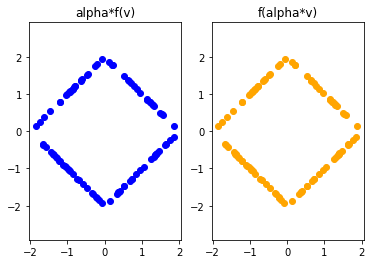

In [8]:
alpha = 2
f_alpha_vv = np.array([f(alpha*v) for v in vv.T]).T

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(alpha*f_vv[0], alpha*f_vv[1], color='blue')
ax2.scatter(f_alpha_vv[0], f_alpha_vv[1], color='orange')
ax1.axis('equal')
ax2.axis('equal')
ax1.set_title('alpha*f(v)')
ax2.set_title('f(alpha*v)')
plt.show()

As we can see, the plot of $f(\alpha \boldsymbol{v})$ completely overlaps the plot of $\alpha\cdot f(\boldsymbol{v})$, since the two are indeed equal.

However, the function $f$ is not additive. We can see this visually as well.

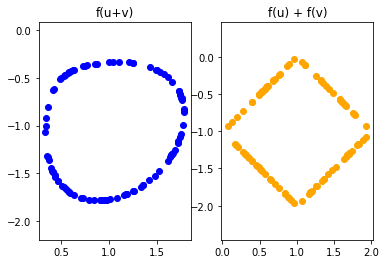

In [9]:
u = np.array([np.sqrt(2), -np.sqrt(2)])

f_u_plus_vv = np.array([f(u + v) for v in vv.T]).T
f_u = f(u)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(f_u_plus_vv[0], f_u_plus_vv[1], color='blue')
ax2.scatter(f_u[0] + f_vv[0], f_u[1] + f_vv[1], color='orange')
ax1.axis('equal')
ax2.axis('equal')
ax1.set_title('f(u+v)')
ax2.set_title('f(u) + f(v)')
plt.show()

Indeed, $f(\boldsymbol{u} + \boldsymbol{v})$ and $f(\boldsymbol{u}) + f(\boldsymbol{v})$ do not give the same output.

### Functions that preserve addition, but not scalar multiplication


There are no continuous functions which have this property for real vector spaces (i.e. vector spaces whose scalars are real numbers). This is in fact due to a property of rational numbers, but what is important to note is that we will not encounter any such functions when working with real vector spaces.

However, for fun, we give an example of a continuous function which preserves addition, but not scalar multiplication, for the complex plane $\mathbb{C}$ considered as a complex vector space, i.e., a vector space whose scalars are complex numbers.
Specifically, the function:

$$ f: a + bi \mapsto a - bi$$

preserves addition, i.e., $f(\boldsymbol{z}_1 + \boldsymbol{z}_2) = f(\boldsymbol{z}_1) + f(\boldsymbol{z}_2)$, but it does not preserve scalar multiplication, e.g., if the scalar $c = i$, and the "vector" $\boldsymbol{z} = 2 + 3i$, then $f(\boldsymbol{z}) = 2 - 3i$, $c \cdot \boldsymbol{z} = -3 + 2i$, so that  $f(c \cdot \boldsymbol{z}) = -3 - 2i$, but $c \cdot f(\boldsymbol{z}) = 3 + 2i$.
This function is called taking the "conjugate" of the complex number.


### Functions that preserve addition and scalar multiplication: linear functions


Now that we've seen many examples of functions which _are not_ linear, let's move on to functions which are linear. Such functions are at the heart of linear algebra. In what follows, we plot examples of linear functions, and in the homework you will use scatter plots like the ones above to verify that the examples given here do indeed satisfy the two properties of linear functions.


#### An example: Rotation

Let's first consider the function $f(\boldsymbol{v})$ which takes any vector $\boldsymbol{v} = (v_1,v_2)$ and rotates it by $\theta$ degrees. This function is given by the following:

$$
f(v_1, v_2) = \left(\cos(\theta)v_1 - \sin(\theta)v_2, \sin(\theta)v_1 + \cos(\theta)v_2\right)
$$

We implement this function below with $\theta = 45^\circ$ as the default.

In [10]:
def rotate(v, theta=np.pi/4):
    return np.array([np.cos(theta)*v[0] - np.sin(theta)*v[1], np.sin(theta)*v[0] + np.cos(theta)*v[1]])

Here, we give points different colors, so that you can verify that the circle on the right is indeed the circle on the left rotated by 45 degrees:

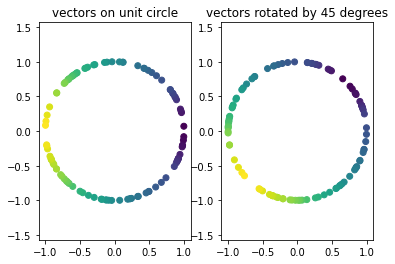

In [11]:
#here we sort the points by their angles from the origin so that the plot coloring looks nice
angles = np.arccos(np.dot(vv.T, np.array([1,0])).flatten())
angles_ix = np.argsort(angles)
vv = vv[:, angles_ix]

f_vv = np.array([rotate(v) for v in vv.T]).T

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(vv[0], vv[1], c=np.arange(n_points))
ax2.scatter(f_vv[0], f_vv[1], c=np.arange(n_points))
ax1.axis('equal')
ax2.axis('equal')
ax1.set_title('vectors on unit circle')
ax2.set_title('vectors rotated by 45 degrees')
plt.show()

Notice how the resulting shape is symmetric about the origin, as it should be for any function that preserves scalar multiplication. You'll verify this, as well as the fact that this function preserves addition, visually on the homework.

#### An example: Stretching

Next, let's consider the function $f(\boldsymbol{v})$ which takes a vector $\boldsymbol{v} = (v_1,v_2)$ and 'stretches' it by a factor of $\alpha$ along the x-axis and  $\beta$ along the y-axes.
The function which performs this operations is given by

$$
f(v_1,v_2) = (\alpha v_1, \beta v_2)
$$

Let's implement it in a simple Python function, with $\alpha=2,\beta=1$ as the default.

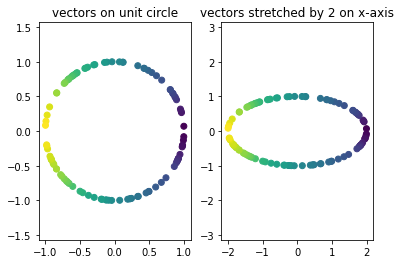

In [12]:
def stretch(v, alpha=2, beta=1):
    return np.array([alpha*v[0], beta*v[1]])

f_vv = np.array([stretch(v) for v in vv.T]).T
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(vv[0], vv[1], c=np.arange(n_points))
ax2.scatter(f_vv[0], f_vv[1], c=np.arange(n_points))
ax1.axis('equal')
ax2.axis('equal')
ax1.set_title('vectors on unit circle')
ax2.set_title('vectors stretched by 2 on x-axis')
plt.show()

This function again preserves scalar multiplication and addition, as you will verify visually on the homework.

#### An example: Projection

The last type of linear function which we will consider are special types of functions called _projections_. We'll talk much more about projections later, but for now let's look at an example.
The function


$$
f(v_1,v_2) = \left(\frac{1}{2}(v_1 + v_2), \frac{1}{2}(v_1 + v_2)\right)
$$


takes any vector $\boldsymbol{v} = (v_1,v_2)$, and maps it to an element of the set $L = \{(x,y)\mid x=y\}$, which is just the $y=x$ line in the plane. Let's visualize this:

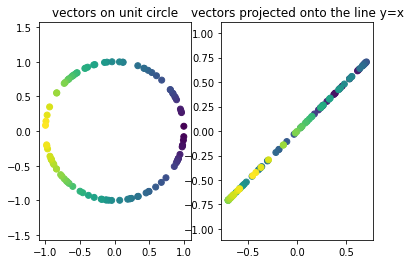

In [13]:
def project_to_line(v):
    return np.array([0.5*(v[0] + v[1]), 0.5*(v[0] + v[1])])

f_vv = np.array([project_to_line(v) for v in vv.T]).T

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(vv[0], vv[1], c=np.arange(n_points))
ax2.scatter(f_vv[0], f_vv[1], c=np.arange(n_points))
ax1.axis('equal')
ax2.axis('equal')
ax1.set_title('vectors on unit circle')
ax2.set_title('vectors projected onto the line y=x')
plt.show()

Here we again color code the plotted points, so that you can see visually where each point is mapped to by $f$. As you can see, some points with different colors overlap. If we only plot points on one side of the circle, we see more clearly how these points are mapped to the line.

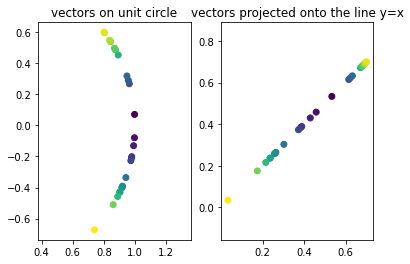

In [14]:
points_to_plot = 25

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(vv[0, :points_to_plot], vv[1, :points_to_plot], c=np.arange(points_to_plot))
ax2.scatter(f_vv[0, :points_to_plot], f_vv[1, :points_to_plot], c=np.arange(points_to_plot))
ax1.axis('equal')
ax2.axis('equal')
ax1.set_title('vectors on unit circle')
ax2.set_title('vectors projected onto the line y=x')
plt.show()

You will again verify visually in the homework that this map preserves scalar multiplication and is additive. Projections are an important type of linear function, which will encounter frequently later on in the class.

### Composition of linear functions

An important property of linear functions is that their composition is also linear. To see this, suppose that $f$ and $g$ are both linear functions, and let $\alpha$ be a scalar, $\boldsymbol{u},\boldsymbol{v}$ be vectors. Then


$$
(g\circ f)(\boldsymbol{u} + \boldsymbol{v}) = g(f(\boldsymbol{u} + \boldsymbol{v})) = g(f(\boldsymbol{u}) + f(\boldsymbol{v})) = g(f(\boldsymbol{u})) + g(f(\boldsymbol{v})) = (g\circ f)(\boldsymbol{u}) + (g\circ f)(\boldsymbol{v})
$$


Indeed, let's try composing two of the functions from the previous section. First, let's try composing `rotate` with `stretch`.

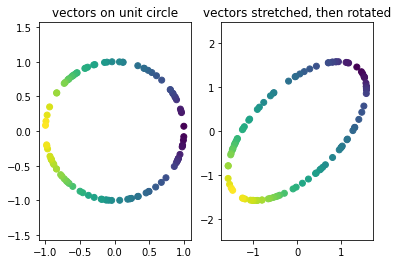

In [15]:
composed_vv = np.array([rotate(stretch(v)) for v in vv.T]).T
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(vv[0], vv[1], c=np.arange(n_points))
ax2.scatter(composed_vv[0], composed_vv[1], c=np.arange(n_points))
ax1.axis('equal')
ax2.axis('equal')
ax1.set_title('vectors on unit circle')
ax2.set_title('vectors stretched, then rotated')
plt.show()

Similarly, we can also compose the other way: first rotating, and then stretching.

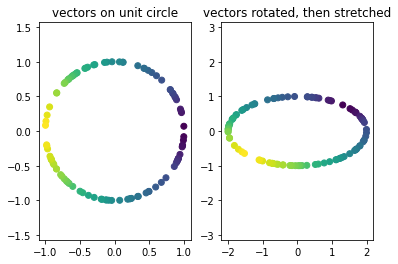

In [16]:
composed_vv2 = np.array([stretch(rotate(v)) for v in vv.T]).T
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(vv[0], vv[1], c=np.arange(n_points))
ax2.scatter(composed_vv2[0], composed_vv2[1], c=np.arange(n_points))
ax1.axis('equal')
ax2.axis('equal')
ax1.set_title('vectors on unit circle')
ax2.set_title('vectors rotated, then stretched')
plt.show()

As we can see, these two compositions give us different functions. This is an important example of when function compositions do not _commute_ -- i.e. that $f\circ g \neq g\circ f$. We will see later on that only very special linear functions commute when composed.